In [1]:
%matplotlib inline 
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from neurodynex.leaky_integrate_and_fire import LIF
from neurodynex.tools import input_factory, plot_tools

Missing compiler_cxx fix for MSVCCompiler


WARNING    Cannot use weave, a test compilation failed: error: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (CompileError) [brian2.codegen.runtime.weave_rt.weave_rt.failed_compile_test]
WARNING    d:\anaconda3\envs\bmnn\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\holmosaint\.cython\brian_extensions\_cython_magic_7415aef673dee03da8a8c2ac4090bf59.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
 [py.warnings]
WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 9.0 is required. Get it from http://aka.ms/vcpython27 (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to

nr of spikes: 0


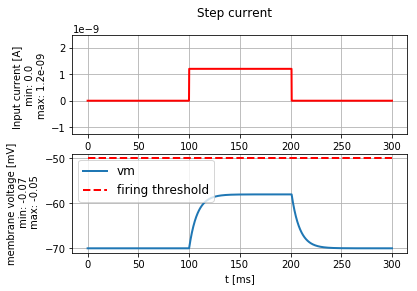

nr of spikes: 5


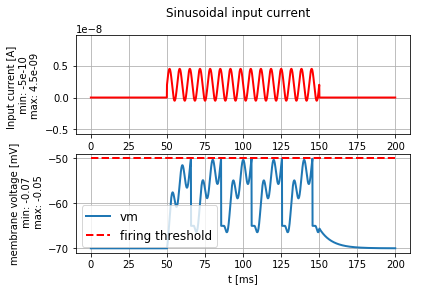

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [2]:
LIF.getting_started()
LIF.print_default_parameters()

In [3]:
V_REST = -70 * b2.mV
V_RESET = -65 * b2.mV
FIRING_THRESHOLD = -50 * b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

In [4]:
from neurodynex.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -0.07


### 2.1.1. Question: minimal current (calculation)
For the default neuron parameters (see above) compute the minimal amplitude i_min of a step current to elicitate a spike.
The answer is $I = 2 nA$

In [7]:
i_min = 2 * b2.nA

nr of spikes: 0


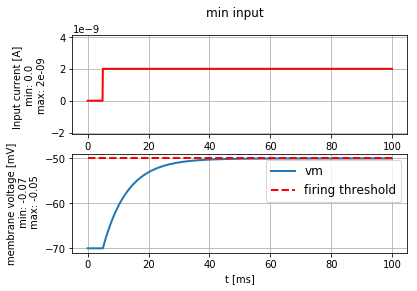

In [8]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= i_min)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

In [9]:
i_min = 2.01 * b2.nA

nr of spikes: 2


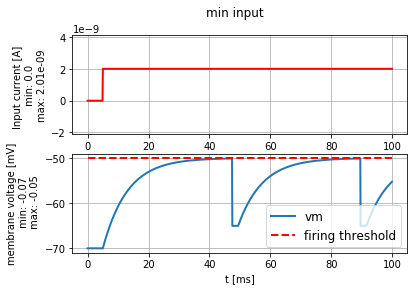

In [10]:
# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude= i_min)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

### 2.2.1 Question: f-I Curve and refractoryness
1. Sketch the f-I curve you expect to see
2. What is the maximum rate at which this neuron can fire?
    - The maximum rate is 333.33Hz. 
3. Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

In [59]:
freq_list = list()
for i in range(0, 100, 2):
    I = i * b2.nA
    
    # create a step current with amplitude= i_min
    step_current = input_factory.get_step_current(
        t_start=5, t_end=100, unit_time=b2.ms,
        amplitude= I)  # set i_min to your value

    # run the LIF model.
    # Note: As we do not specify any model parameters, the simulation runs with the default values
    (state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, 
                                                            abs_refractory_period=3 * b2.ms,
                                                            simulation_time=500 * b2.ms)

    if spike_monitor.num_spikes == 0:
        freq = 0
    else:
        freq = spike_monitor.num_spikes / spike_monitor.t[-1]
    freq_list.append(freq)

Text(0,0.5,'Frequency (Hz)')

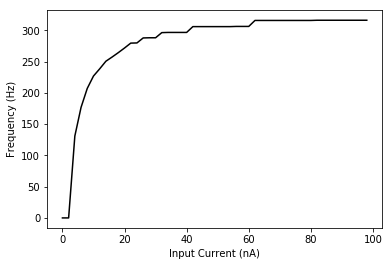

In [60]:
plt.plot(np.arange(0, 100, 2), freq_list, c='k')
plt.xlabel('Input Current (nA)')
plt.ylabel('Frequency (Hz)')

In [61]:
print("Max firing frequency: {:.2f}Hz".format(max(freq_list)))

Max firing frequency: 316.00Hz


### 2.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

(<matplotlib.axes._subplots.AxesSubplot at 0xc673d30>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc47ad68>)

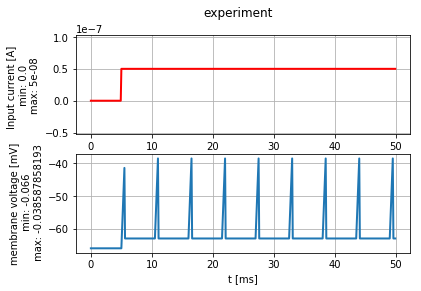

In [84]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms, amplitude= 50 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

nr of spikes: 8


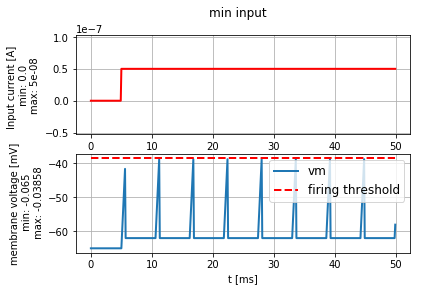

In [93]:
i = 50 * b2.namp

# create a step current with amplitude= i_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=50, unit_time=b2.ms,
    amplitude=i)  # set i_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, 
                                                        simulation_time = 50 * b2.ms,
                                                        abs_refractory_period=5*b2.ms,
                                                        firing_threshold=-38.58*b2.mV,
                                                        membrane_time_scale=11*b2.ms,
                                                        membrane_resistance=8.8*b2.Mohm,
                                                        v_rest=-65.0*b2.mV,
                                                        v_reset=-62.0*b2.mV)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=-38.58*b2.mV)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

In [94]:
# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

Resting potential: -0.066
Reset voltage: -0.063
Firing threshold: -0.038
Membrane resistance: 13000000.0
Membrane time-scale: 0.013
Absolute refractory period: 0.005


### 2.4. Exercise: Sinusoidal input current and subthreshold response

In [238]:
def func(x, a, f, c, d):
    return (a * np.sin(4 * f * x + c) + d)

In [250]:
amp_list = list()
freq_list = list()
phase_list = list()
for input_freq in range(20, 1000, 10):
    # note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
    sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                                amplitude= 2.5 * b2.namp, frequency=input_freq*b2.Hz,
                                                direct_current=0. * b2.namp)

    # run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

    peaks, _ = find_peaks(state_monitor.v[0])
    amp = state_monitor.v[0][peaks]
    amp = np.mean(amp)
    amp_list.append(amp)
    
    if peaks.shape[0] % 2 != 0:
        peaks = peaks[:-1]
    freq = 1 / np.mean(peaks[1::2] - peaks[0::2]) * 1e4
    freq_list.append(freq)
    
    xdata = np.arange(200, 1000, 1)
    popt, pcov = scipy.optimize.curve_fit(func, xdata, state_monitor.v[0][200:1000], p0=[amp, freq * np.pi, 1, -65], method='dogbox')
    phase_list.append(popt[2])

Text(0.5,0,'Input Current Frequency')

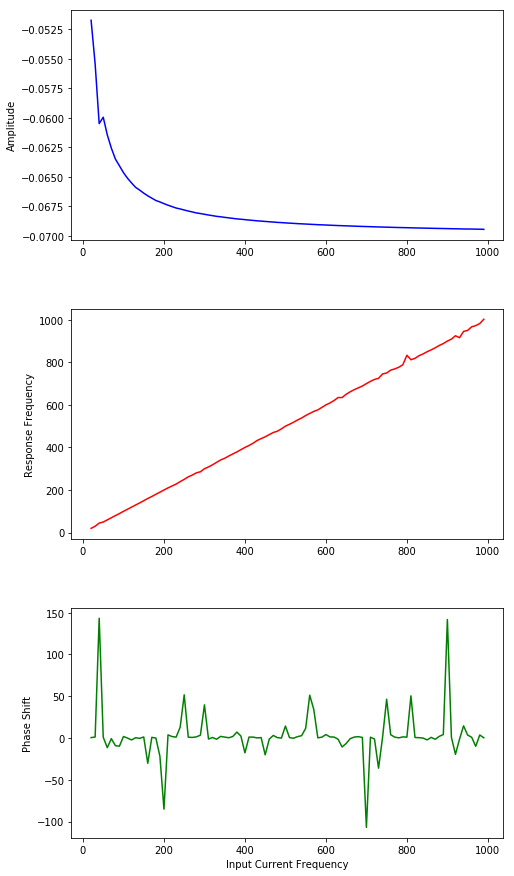

In [266]:
plt.subplots_adjust(left=0, bottom=None, right=1, top=3,
                wspace=None, hspace=0.3)
plt.subplot(311)
plt.plot(np.arange(20, 1000, 10), amp_list, c='b')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(np.arange(20, 1000, 10), freq_list, c='r')
plt.ylabel('Response Frequency')
plt.subplot(313)
plt.plot(np.arange(20, 1000, 10), phase_list, c='g')
plt.ylabel('Phase Shift')
plt.xlabel('Input Current Frequency')

It is a low-pass filter.